In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Pre_processing

In [5]:
# '?' character remove process in the dataset
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)

In [6]:
# Filling missing numeric data in the dataset with mean
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [8]:
# Removing tab spaces in the data
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}) 
df['cad'] = df['cad'].replace(to_replace='\tno',value='no') 
df['classification'] = df['classification'].replace(to_replace='ckd\t',value='ckd')

In [9]:
# Mapping the text to 1/0 and cleaning the dataset 
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0})
df.rename(columns={'classification':'class'},inplace=True)

In [11]:
df.drop('id', axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.000000,...,44.0,7800.0,5.000000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,148.036517,...,38.0,6000.0,4.241636,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,31.0,7500.0,4.241636,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,32.0,6700.0,3.000000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,35.0,7300.0,4.000000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [12]:
df.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wc         0
rc         0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [14]:
# Filling the missing string data as the most repetitive (mod)
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [16]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif

Text(0, 0.5, 'Feature')

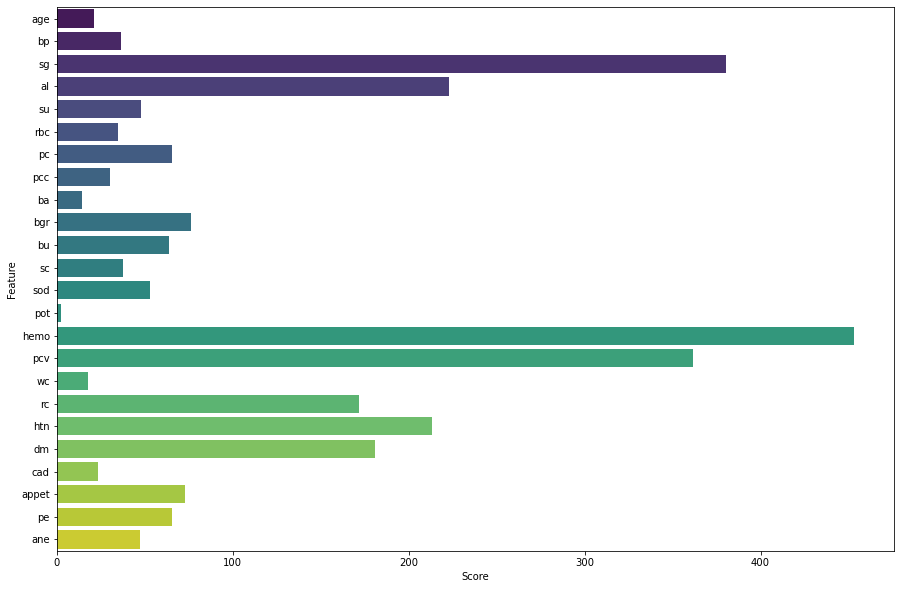

In [17]:
X = df.drop(['class'], axis=1)
y = df['class']
bestFeatures = SelectKBest(score_func = f_classif, k='all')
fit = bestFeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Visualizing
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis', orient='h')
plt.xlabel('Score')
plt.ylabel('Feature')

Scalling

In [24]:
features = [['age', 'bp','sg','al','su','bgr','bu', 'sc', 'sod','pot','hemo','pcv','wc', 'rc']]


# Scaling of the data
for feature in features:
    df[feature]=(df[feature]-np.min(df[feature]))/(np.max(df[feature])-np.min(df[feature]))

In [34]:
X_data = df.drop(['class'], axis=1)
y = df['class'].values

In [35]:
X_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.522727,0.230769,0.75,0.2,0.0,0.0,0.0,0.0,0.0,0.211538,...,0.836735,0.777778,0.231405,0.500000,1.0,1.0,0.0,1.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,0.0,0.0,0.0,0.0,0.269309,...,0.557823,0.644444,0.157025,0.373606,0.0,0.0,0.0,1.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.856838,...,0.442177,0.488889,0.219008,0.373606,0.0,1.0,0.0,0.0,0.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,0.202991,...,0.551020,0.511111,0.185950,0.166667,1.0,0.0,0.0,0.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.179487,...,0.578231,0.577778,0.210744,0.333333,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.252137,...,0.857143,0.844444,0.185950,0.333333,0.0,0.0,0.0,1.0,0.0,0.0
396,0.454545,0.153846,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.113248,...,0.911565,1.000000,0.231405,0.666667,0.0,0.0,0.0,1.0,0.0,0.0
397,0.113636,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.863946,0.888889,0.181818,0.500000,0.0,0.0,0.0,1.0,0.0,0.0
398,0.170455,0.076923,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.196581,...,0.755102,0.933333,0.206612,0.500000,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_data,y,test_size=0.3,random_state=0)

In [47]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn=KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=6)

In [49]:
knn_pred = knn.predict(X_test_scaled)
f1_knn=f1_score(y_test,knn_pred)


precision_knn = precision_score(y_test, knn_pred)


recall_knn = recall_score(y_test, knn_pred)




print("KNN f1 score: ",f1_knn)
print("KNN Precision: ",precision_knn)
print("KNN Recall: ", recall_knn)
print("KNN accuracy score: ",knn.score(x_test,y_test))

KNN f1 score:  0.9787234042553191
KNN Precision:  1.0
KNN Recall:  0.9583333333333334
KNN accuracy score:  0.8333333333333334


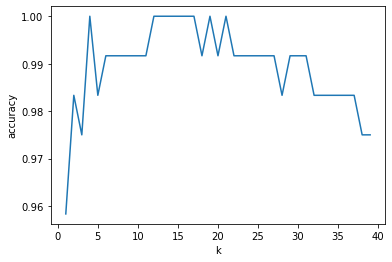

In [50]:
import matplotlib.pyplot as plt
score_list=[]

for each in range(1,40):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(X_test_scaled,y_test))
plt.plot(range(1,40),score_list)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

## SVM

In [51]:
from sklearn.svm import SVC
svm=SVC(random_state=1,gamma="auto")
svm.fit(X_train_scaled,y_train)

SVC(gamma='auto', random_state=1)

In [52]:
svm_pred=svm.predict(X_test_scaled)

f1_svm=f1_score(y_test,svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)

print("SVM f1 score: ",f1_svm)
print("SVM Precision: ",precision_svm)
print("SVM Recall: ", recall_svm)
print("SVM accuracy score: ",svm.score(x_test,y_test))

SVM f1 score:  0.993006993006993
SVM Precision:  1.0
SVM Recall:  0.9861111111111112
SVM accuracy score:  0.95


## Random Forrest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=1)

In [54]:
rf_pred=rf.predict(X_test_scaled)

f1_rf=f1_score(y_test,rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)

print("RF f1 score: ",f1_rf)
print("RF Precision: ",precision_rf)
print("RF Recall:",recall_rf)
print("RF accuracy score: ",rf.score(x_test,y_test))

RF f1 score:  0.993103448275862
RF Precision:  0.9863013698630136
RF Recall: 1.0
RF accuracy score:  0.7416666666666667


So the best classifier is the SVM one

In [56]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

In [57]:
svm_param = {
    "C": [0.01, 0.1, 1, 5, 10, 100],
    "gamma": [0, 0.01, 0.1, 1, 5, 10, 100],
    "kernel": ["rbf", "linear" "poly"],
    "random_state": [0]
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=svm_param,
    scoring=None,
    n_jobs=-1,
    cv=10,
    verbose=0,
    return_train_score=True)

clf.fit(X=X_train_scaled, y=y_train)
preds = clf.predict(X_test_scaled)
cfmatrix = confusion_matrix(
            y_true=y_test, y_pred=preds)
print("Grid Search Results of SVC Grid")
print("The best parameters are: ", clf.best_params_)
print("Best trainning accuracy: \t", clf.best_score_)
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=preds))

Grid Search Results of SVC Grid
The best parameters are:  {'C': 5, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0}
Best trainning accuracy: 	 0.9964285714285716
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        72

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [58]:
f1_svm=f1_score(y_test,preds)
precision_svm = precision_score(y_test, preds)
recall_svm = recall_score(y_test, preds)

print("SVM f1 score: ",f1_svm)
print("SVM Precision: ",precision_svm)
print("SVM Recall: ", recall_svm)
print("SVM accuracy score: ",svm.score(x_test,y_test))

SVM f1 score:  0.993006993006993
SVM Precision:  1.0
SVM Recall:  0.9861111111111112
SVM accuracy score:  0.95


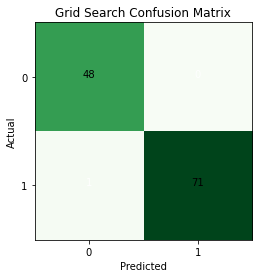

In [61]:
plt.subplots()
classes=sorted(df['class'].unique())
plt.imshow(cfmatrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Grid Search Confusion Matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
thresh = cfmatrix.mean()
for i, j in itertools.product(range(cfmatrix.shape[0]), range(cfmatrix.shape[1])):
        plt.text(j, i, format(cfmatrix[i, j]), 
                 horizontalalignment="center",
                 color="white" if cfmatrix[i, j] < thresh else "black")

### Saving best model

In [59]:
import pickle

filename = 'kidney_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

0.9916666666666667
